(examples-3d-models)=

# Graphics - 3D models and CAD

(examples-own-3d-models)=
## Custom 3D models

Each Magpylib object has a default 3D representation that is displayed with `show`. Users can add a custom 3D model to any Magpylib object with help of the `style.model3d.add_trace` method. The new trace is stored in `style.model3d.data`. User-defined traces move with the object just like the default models do. The default trace can be hidden with the command `obj.model3d.showdefault=False`. When using the `'generic'` backend, custom traces are automatically translated into any other backend. If a specific backend is used, it will only show when called with the corresponding backend.

The input `trace` is a dictionary which includes all necessary information for plotting or a `magpylib.graphics.Trace3d` object. A `trace` dictionary has the following keys:

1. `'backend'`: `'generic'`, `'matplotlib'` or `'plotly'`
2. `'constructor'`: name of the plotting constructor from the respective backend, e.g. plotly `'Mesh3d'` or matplotlib `'plot_surface'`
3. `'args'`: default `None`, positional arguments handed to constructor
4. `'kwargs'`: default `None`, keyword arguments handed to constructor
5. `'coordsargs'`: tells magpylib which input corresponds to which coordinate direction, so that geometric representation becomes possible. By default `{'x': 'x', 'y': 'y', 'z': 'z'}` for the `'generic'` backend and Plotly backend,  and `{'x': 'args[0]', 'y': 'args[1]', 'z': 'args[2]'}` for the Matplotlib backend.
6. `'show'`: default `True`, toggle if this trace should be displayed
7. `'scale'`: default 1, object geometric scaling factor
8. `'updatefunc'`: default `None`, updates the trace parameters when `show` is called. Used to generate  dynamic traces.

The following example shows how a **generic** trace is constructed with  `Mesh3d` and `Scatter3d` and is displayed with three different backends:

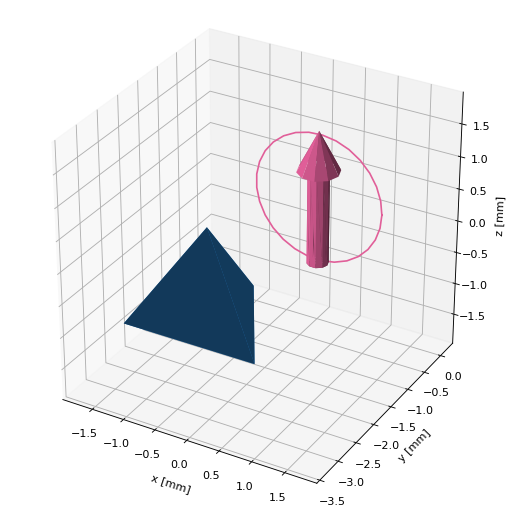

In [1]:
import numpy as np
import magpylib as magpy
import pyvista as pv

pv.set_jupyter_backend('panel') # improve rendering in a jupyter notebook

# Mesh3d trace #########################

trace_mesh3d = {
    'backend': 'generic',
    'constructor': 'Mesh3d',
    'kwargs': {
        'x': (1, 0, -1, 0),
        'y': (-.5, 1.2, -.5, 0),
        'z': (-.5, -.5, -.5, 1),
        'i': (0, 0, 0, 1),
        'j': (1, 1, 2, 2),
        'k': (2, 3, 3, 3),
        #'opacity': 0.5,
    },
}
coll = magpy.Collection(position=(0,-3,0), style_label="'Mesh3d' trace")
coll.style.model3d.add_trace(trace_mesh3d)

# Scatter3d trace ######################

ts = np.linspace(0, 2*np.pi, 30)
trace_scatter3d = {
    'backend': 'generic',
    'constructor': 'Scatter3d',
    'kwargs': {
        'x': np.cos(ts),
        'y': np.zeros(30),
        'z': np.sin(ts),
        'mode': 'lines',
    }
}
dipole = magpy.misc.Dipole(moment=(0,0,1), style_label="'Scatter3d' trace", style_size=6)
dipole.style.model3d.add_trace(trace_scatter3d)

magpy.show(coll, dipole, backend='matplotlib')
magpy.show(coll, dipole, backend='plotly')
magpy.show(coll, dipole, backend='pyvista')

It is possible to have multiple user-defined traces that will be displayed at the same time. In addition, the following code shows how to quickly copy and manipulate trace dictionaries and `Trace3d` objects,

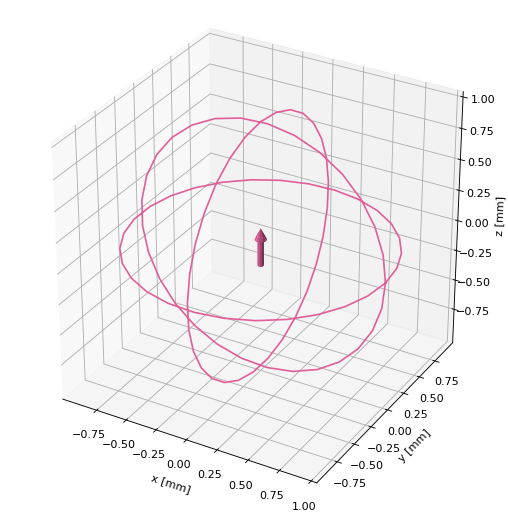

In [2]:
import copy
dipole.style.size=3

# generate new trace from dictionary
trace2 = copy.deepcopy(trace_scatter3d)
trace2['kwargs']['y'] = np.sin(ts)
trace2['kwargs']['z'] = np.zeros(30)

dipole.style.model3d.add_trace(trace2)

# generate new trace from Trace3d object
trace3 = dipole.style.model3d.data[1].copy()
trace3.kwargs['x'] = np.zeros(30)
trace3.kwargs['z'] = np.cos(ts)

dipole.style.model3d.add_trace(trace3)

dipole.show(dipole, backend='matplotlib')

**Matplotlib** plotting functions often use positional arguments for $(x,y,z)$ input, that are handed over from `args=(x,y,z)` in `trace`. The following examples show how to construct traces with `plot`, `plot_surface` and `plot_trisurf`:

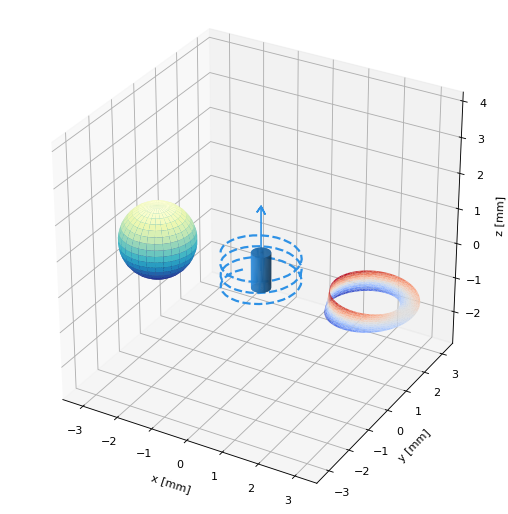

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import magpylib as magpy

# plot trace ###########################

ts = np.linspace(-10,10,100)
xs = np.cos(ts)
ys = np.sin(ts)
zs = ts/20

trace_plot = {
    'backend': 'matplotlib',
    'constructor': 'plot',
    'args': (xs,ys,zs),
    'kwargs': {'ls': '--', 'lw': 2},
}
magnet = magpy.magnet.Cylinder(magnetization=(0,0,1), dimension=(.5,1))
magnet.style.model3d.add_trace(trace_plot)

# plot_surface trace ###################

u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
xs = np.cos(u) * np.sin(v)
ys = np.sin(u) * np.sin(v)
zs = np.cos(v)

trace_surf = {
    'backend': 'matplotlib',
    'constructor': 'plot_surface',
    'args': (xs,ys,zs),
    'kwargs': {'cmap': plt.cm.YlGnBu_r},
}
ball = magpy.Collection(position=(-3,0,0))
ball.style.model3d.add_trace(trace_surf)

# plot_trisurf trace ###################

u, v = np.mgrid[0:2*np.pi:50j, -.5:.5:10j]
u, v = u.flatten(), v.flatten()

xs = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
ys = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
zs = 0.5 * v * np.sin(u / 2.0)

tri = mtri.Triangulation(u, v)

trace_trisurf = {
    'backend': 'matplotlib',
    'constructor': 'plot_trisurf',
    'args': (xs,ys,zs),
    'kwargs': {
        'triangles': tri.triangles,
        'cmap': plt.cm.coolwarm,
    },
}
mobius = magpy.misc.CustomSource(style_model3d_showdefault=False, position=(3,0,0))
mobius.style.model3d.add_trace(trace_trisurf)

magpy.show(magnet, ball, mobius, zoom=2)

## Pre-defined 3D models

Automatic trace generators are provided for several basic 3D models in `magpylib.graphics.model3d`. If no backend is specified, it defaults back to `'generic'`. They can be used as follows,

In [4]:
import magpylib as magpy
from magpylib.graphics import model3d

# prism trace ###################################
trace_prism = model3d.make_Prism(
    base=6,
    diameter=2,
    height=1,
    position=(-3,0,0),
)
obj0 = magpy.Sensor(style_model3d_showdefault=False, style_label='Prism')
obj0.style.model3d.add_trace(trace_prism)

# pyramid trace #################################
trace_pyramid = model3d.make_Pyramid(
    base=30,
    diameter=2,
    height=1,
    position=(3,0,0),
)
obj1 = magpy.Sensor(style_model3d_showdefault=False, style_label='Pyramid')
obj1.style.model3d.add_trace(trace_pyramid)

# cuboid trace ##################################
trace_cuboid = model3d.make_Cuboid(
    dimension=(2,2,2),
    position=(0,3,0),
)
obj2 = magpy.Sensor(style_model3d_showdefault=False, style_label='Cuboid')
obj2.style.model3d.add_trace(trace_cuboid)

# cylinder segment trace ########################
trace_cylinder_segment = model3d.make_CylinderSegment(
    dimension=(1, 2, 1, 140, 220),
    position=(1,0,-3),
)
obj3 = magpy.Sensor(style_model3d_showdefault=False, style_label='Cylinder Segment')
obj3.style.model3d.add_trace(trace_cylinder_segment)

# ellipsoid trace ###############################
trace_ellipsoid = model3d.make_Ellipsoid(
    dimension=(2,2,2),
    position=(0,0,3),
)
obj4 = magpy.Sensor(style_model3d_showdefault=False, style_label='Ellipsoid')
obj4.style.model3d.add_trace(trace_ellipsoid)

# arrow trace ###################################
trace_arrow = model3d.make_Arrow(
    base=30,
    diameter=0.6,
    height=2,
    position=(0,-3,0),
)
obj5 = magpy.Sensor(style_model3d_showdefault=False, style_label='Arrow')
obj5.style.model3d.add_trace(trace_arrow)

magpy.show(obj0, obj1, obj2, obj3, obj4, obj5, backend='plotly')

(examples-adding-CAD-model)=

## Adding a CAD model

As shown in {ref}`examples-3d-models`, it is possible to attach custom 3D model representations to any Magpylib object. In the example below we show how a standard CAD model can be transformed into a generic Magpylib graphic trace, and displayed by both `matplotlib` and `plotly` backends.

```{note}
The code below requires installation of the `numpy-stl` package.
```

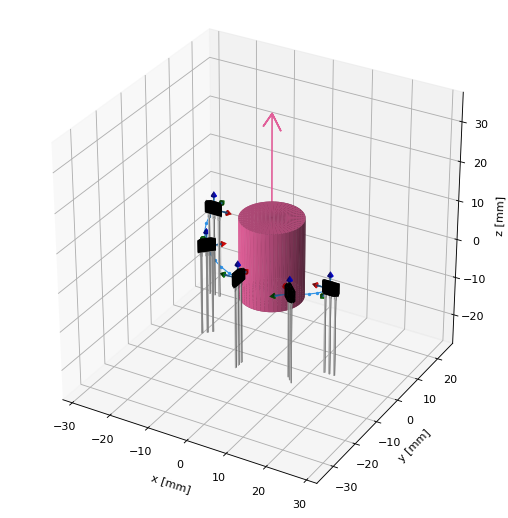

In [5]:
import os
import tempfile
import requests
import numpy as np
from stl import mesh  # requires installation of numpy-stl
import magpylib as magpy
from matplotlib.colors import to_hex


def bin_color_to_hex(x):
    """ transform binary rgb into hex color"""
    sb = f"{x:015b}"[::-1]
    r = int(sb[:5], base=2)/31
    g = int(sb[5:10], base=2)/31
    b = int(sb[10:15], base=2)/31
    return to_hex((r,g,b))
    


def trace_from_stl(stl_file):
    """
    Generates a Magpylib 3D model trace dictionary from an *.stl file.
    backend: 'matplotlib' or 'plotly'
    """
    # load stl file
    stl_mesh = mesh.Mesh.from_file(stl_file)

    # extract vertices and triangulation
    p, q, r = stl_mesh.vectors.shape
    vertices, ixr = np.unique(stl_mesh.vectors.reshape(p * q, r), return_inverse=True, axis=0)
    i = np.take(ixr, [3 * k for k in range(p)])
    j = np.take(ixr, [3 * k + 1 for k in range(p)])
    k = np.take(ixr, [3 * k + 2 for k in range(p)])
    x, y, z = vertices.T

    # generate and return a generic trace which can be translated into any backend
    colors = stl_mesh.attr.flatten()
    facecolor = np.array([bin_color_to_hex(c) for c in colors]).T
    trace = {
        'backend': 'generic',
        'constructor': 'mesh3d',
        'kwargs': dict(x=x, y=y, z=z, i=i, j=j, k=k, facecolor=facecolor),
    }
    return trace


# load stl file from online resource
url = "https://raw.githubusercontent.com/magpylib/magpylib-files/main/PG-SSO-3-2.stl"
file = url.split("/")[-1]
with tempfile.TemporaryDirectory() as temp:
    fn = os.path.join(temp, file)
    with open(fn, "wb") as f:
        response = requests.get(url)
        f.write(response.content)

    # create traces for both backends
    trace = trace_from_stl(fn)

# create sensor and add CAD model
sensor = magpy.Sensor(style_label='PG-SSO-3 package')
sensor.style.model3d.add_trace(trace)

# create magnet and sensor path
magnet = magpy.magnet.Cylinder(magnetization=(0,0,100), dimension=(15,20))
sensor.position = np.linspace((-15,0,8), (-15,0,-4), 21)
sensor.rotate_from_angax(np.linspace(0, 180, 21), 'z', anchor=0, start=0)

# display with matplotlib and plotly backends
args = (sensor, magnet)
kwargs = dict(style_path_frames=5)
magpy.show(args, **kwargs,  backend="matplotlib")
magpy.show(args, **kwargs, backend="plotly")